# step-1 importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# step-2 Loading data 

In [2]:
# Specify the encoding
data = pd.read_csv("C:\\Users\\ASUS\\Downloads\\car_purchasing.csv", encoding="latin1")  # Try 'latin1'
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [4]:
data.shape

(500, 9)

In [5]:
data.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [6]:
data.isnull().sum()

customer name          0
customer e-mail        0
country                0
gender                 0
age                    0
annual Salary          0
credit card debt       0
net worth              0
car purchase amount    0
dtype: int64

In [7]:
# Let's rename some columns to make it more readable
columns_to_rename = {
    'customer name': 'customer_name',
    'customer e-mail': 'customer_email',
    'annual Salary': 'annual_salary',
    'credit card debt': 'credit_card_debt',
    'net worth': 'net_worth',
    'car purchase amount': 'car_value'
}
data.rename(columns=columns_to_rename, inplace=True)

In [8]:
data

,customer_name,customer_email,country,gender,age,annual_salary,credit_card_debt,net_worth,car_value
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [9]:
# For my purposes, I will drop customer_name and customer_email columns because they are not needed
data.drop(['customer_name', 'customer_email'], axis=1, inplace=True)

In [10]:
data.head()

,country,gender,age,annual_salary,credit_card_debt,net_worth,car_value
0,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [11]:
# We also map the gender column to more readable values
#data['gender'] = data['gender'].map({1:'Male', 0:'Female'})

In [12]:
# Age should be an integer not a float
data['age'] = data['age'].astype(int)

In [13]:
data.duplicated().sum()

0

In [14]:
data

,country,gender,age,annual_salary,credit_card_debt,net_worth,car_value
0,Bulgaria,0,41,62812.09301,11609.380910,238961.2505,35321.45877
1,Belize,0,40,66646.89292,9572.957136,530973.9078,45115.52566
2,Algeria,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Cook Islands,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Brazil,1,57,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...
495,Nepal,0,41,71942.40291,6995.902524,541670.1016,48901.44342
496,Zimbabwe,1,37,56039.49793,12301.456790,360419.0988,31491.41457
497,Philippines,1,53,68888.77805,10611.606860,764531.3203,64147.28888
498,Botswana,1,59,49811.99062,14013.034510,337826.6382,45442.15353


# Analysis

In [15]:
data.describe()

,gender,age,annual_salary,credit_card_debt,net_worth,car_value
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,45.774000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.988652,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [16]:
data['country'].value_counts().sort_values()   # sorting based on frequency

country
marlal        1
Tonga         1
Rwanda        1
Mexico        1
Honduras      1
             ..
Armenia       5
Bhutan        5
Bolivia       6
Mauritania    6
Israel        6
Name: count, Length: 211, dtype: int64

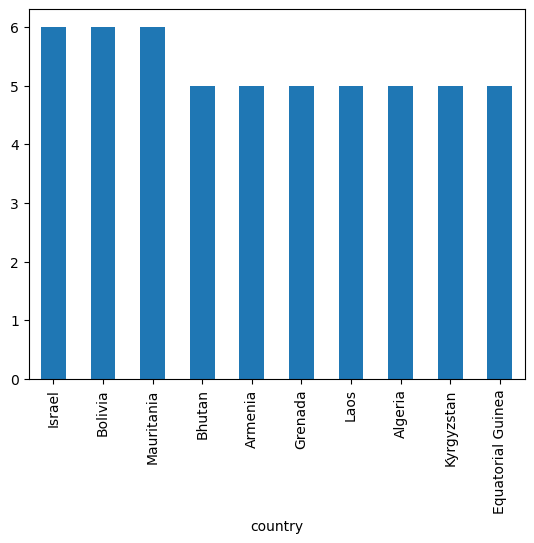

In [17]:
data['country'].value_counts().sort_values(ascending= False).head(10).plot(kind = 'bar')
plt.show()

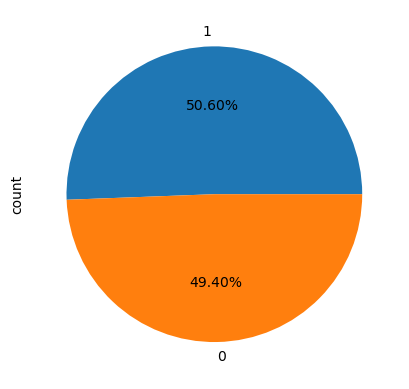

In [18]:
data['gender'].value_counts().plot(kind = 'pie',autopct = "%1.2f%%")
plt.show()   # there are almost same number of male and female


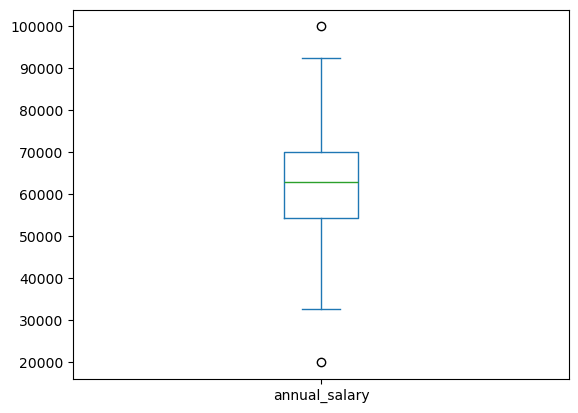

In [19]:
data['annual_salary'].plot(kind ='box')
plt.show()

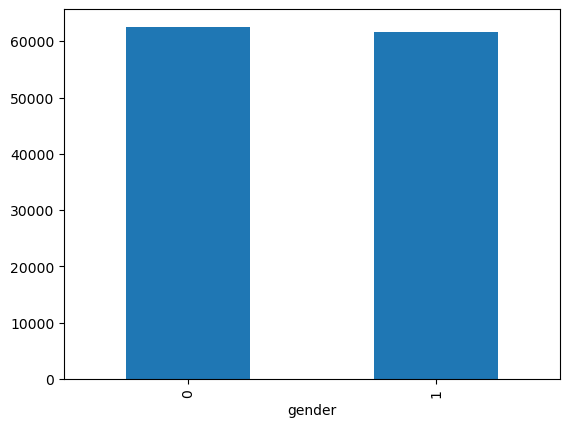

In [20]:
# gender vs annual salary
data.groupby('gender')['annual_salary'].mean().plot(kind = 'bar')
plt.show()
#  both male and female earns almost the same 

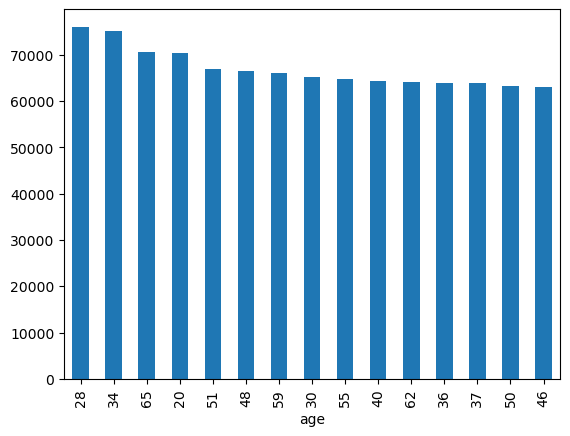

In [21]:
# age vs annual salary( 15 age with highest salary)
data.groupby('age')['annual_salary'].mean().sort_values(ascending = False).head(15).plot(kind = 'bar')
plt.show()

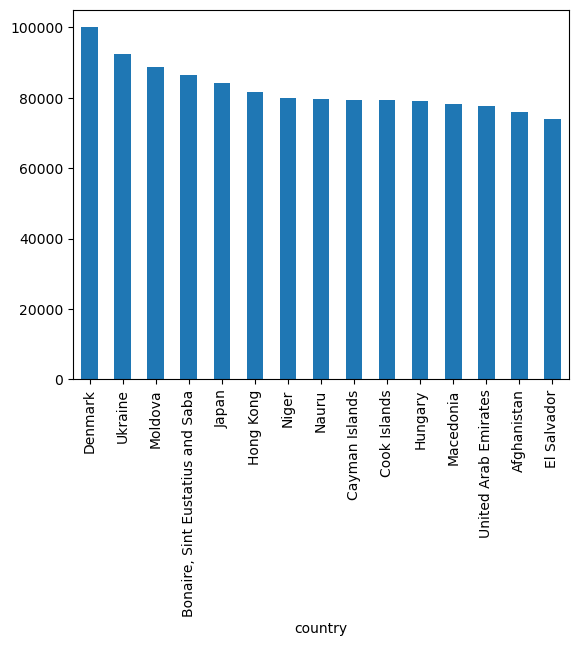

In [22]:
# country vs annual salary
data.groupby('country')['annual_salary'].mean().sort_values(ascending = False).head(15).plot(kind = 'bar')
plt.show()
# people from denmark earns the most (avg)

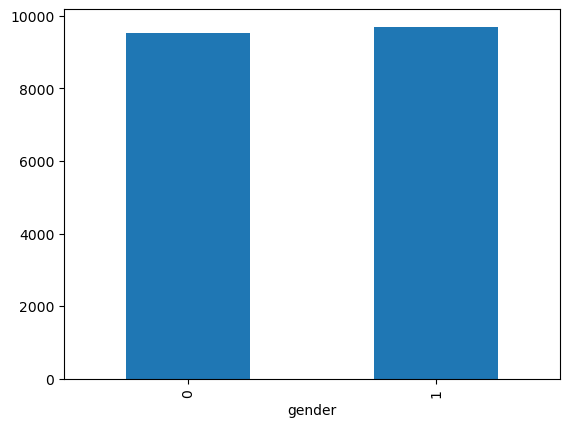

In [23]:
# gender vs credit card debt 
data.groupby('gender')['credit_card_debt'].mean().plot(kind = 'bar')
plt.show()

In [24]:
X = data.drop('car_value', axis=1)
y = data['car_value']

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
label_encoder = LabelEncoder()

In [27]:
X.loc[:,'country'] = label_encoder.fit_transform(X['country'])

In [28]:
X

,country,gender,age,annual_salary,credit_card_debt,net_worth
0,27,0,41,62812.09301,11609.380910,238961.2505
1,17,0,40,66646.89292,9572.957136,530973.9078
2,1,1,43,53798.55112,11160.355060,638467.1773
3,41,1,58,79370.03798,14426.164850,548599.0524
4,26,1,57,59729.15130,5358.712177,560304.0671
...,...,...,...,...,...,...
495,128,0,41,71942.40291,6995.902524,541670.1016
496,208,1,37,56039.49793,12301.456790,360419.0988
497,144,1,53,68888.77805,10611.606860,764531.3203
498,24,1,59,49811.99062,14013.034510,337826.6382


In [29]:
from sklearn.preprocessing import OneHotEncoder
OHE = OneHotEncoder()
OHE.fit_transform(data.country.values.reshape(-1,1)).toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)
y_pred

array([38542.56123622, 43579.21074052, 29073.93048674, 52065.46069653,
       38175.97081544, 53141.81854555, 60527.98550707, 59213.89607004,
       37261.18681186, 31070.94543336, 47198.6241169 , 56702.84246915,
       54085.15788609, 71076.94631033, 27841.75297597, 31686.14113583,
       48152.28462304, 58522.65477144, 42672.65512475, 10485.35126297,
       48461.57508349, 37451.62647699, 46166.07841344, 27706.465787  ,
       69124.21576424, 44076.85673865, 43723.89681806, 46415.58418704,
       61803.9429304 , 58510.42561586, 48369.19849345, 42189.39088925,
       54990.08929647, 43018.08052252, 63318.25651339, 60459.5078788 ,
       35670.67954347, 59955.90008836, 42711.52419947, 42758.28710717,
       59858.33349086, 34389.50166041, 30612.48746542, 37299.41838169,
       41393.55980408, 44792.45406828, 44594.33257286, 53586.55818302,
       38117.64236114, 33635.56077374, 35380.29174343, 41061.14876251,
       50029.99131092, 53714.84897578, 39832.36810364, 28745.0771661 ,
      

In [35]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 53882.38400457725
R² Score: 0.9995526332086622


In [37]:
data = "C:\\Users\\ASUS\\Downloads\\car_purchasing.csv"